In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [65]:
df = pd.read_csv('tripadvisor_review.csv')
X = df.iloc[:, 1:]
X

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


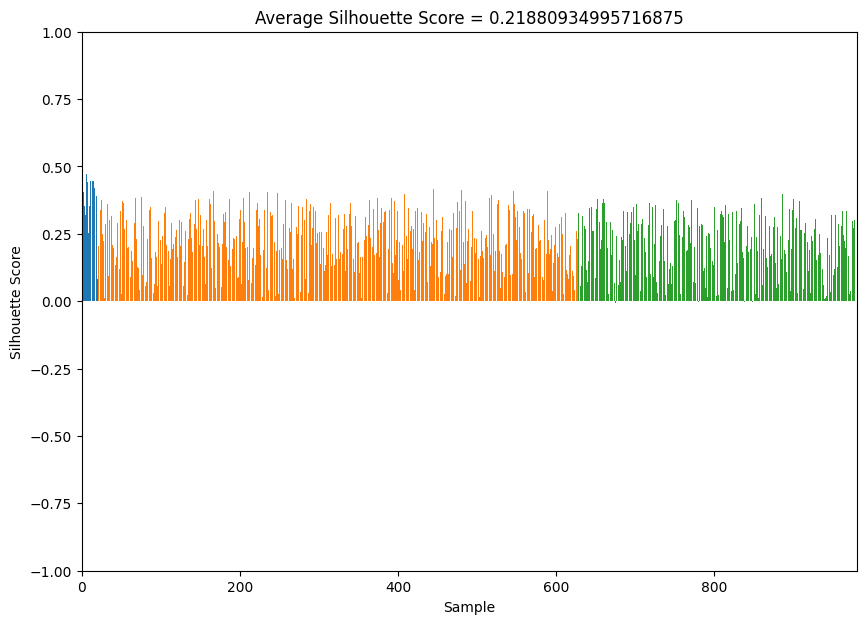

In [89]:
X = StandardScaler().fit_transform(X)
K = 3
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
silhouette_values = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)

plt.figure(figsize=(10, 7))

sample = 0
for i in range(0, K):
    sil = silhouette_values[cluster_labels == i]
    plt.bar(np.arange(sample, sample + sil.size), sil)
    sample += sil.size

plt.xlim([0, len(X)])
plt.ylim([-1, 1])

plt.xlabel('Sample')
plt.ylabel('Silhouette Score')
plt.title(f"Average Silhouette Score = {silhouette_avg}")

plt.show()

In [70]:
X_pca = PCA(n_components=2).fit_transform(X)
X_pca

array([[ 2.40757283, -0.07303858],
       [ 5.31123728, -0.02250014],
       [-0.80783928, -1.7769507 ],
       ...,
       [-1.06443926,  0.45864112],
       [-2.20098214, -1.95890684],
       [ 0.98252801, -0.37132355]])

In [76]:
X = StandardScaler().fit_transform(X)
K = 2
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
silhouette_values = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)

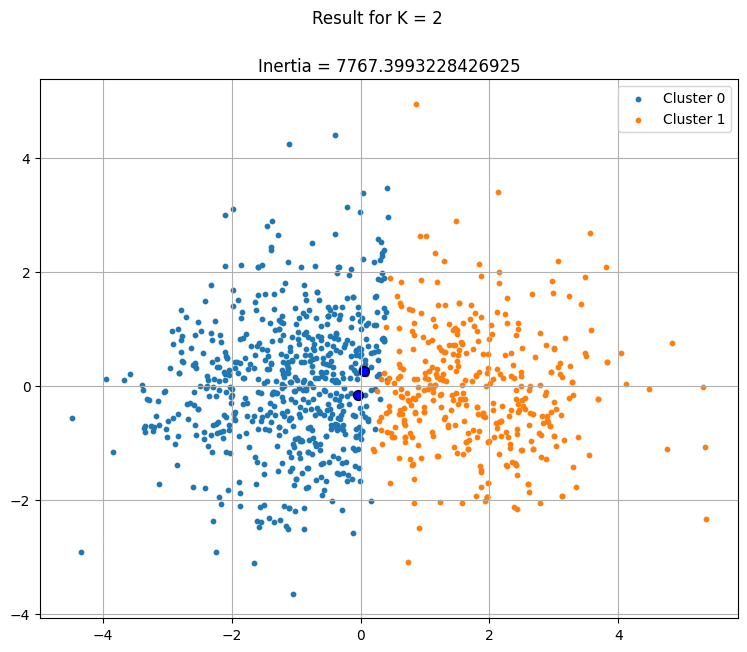

In [77]:
# Initialize the matplotlib figure for the two subplots
fig, ax1 = plt.subplots(1, 1)  # Using only one subplot for clustering visualization
fig.set_size_inches(9, 7)
fig.suptitle(f"Result for K = {K}")

# Scatter plot for PCA-reduced data colored by cluster
for i in range(0, K):
    ax1.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], s=10, label=f'Cluster {i}')
# ax1.scatter(centroids[:, 0], centroids[:, 1], s=50, color='black', edgecolor='k', label='Centroids')
ax1.scatter(centroids[:,0],centroids[:,1], s=50, color='b', edgecolor='k')

ax1.set_title(f"Inertia = {inertia}")
ax1.grid()
ax1.legend()

# Show the plot
plt.show()

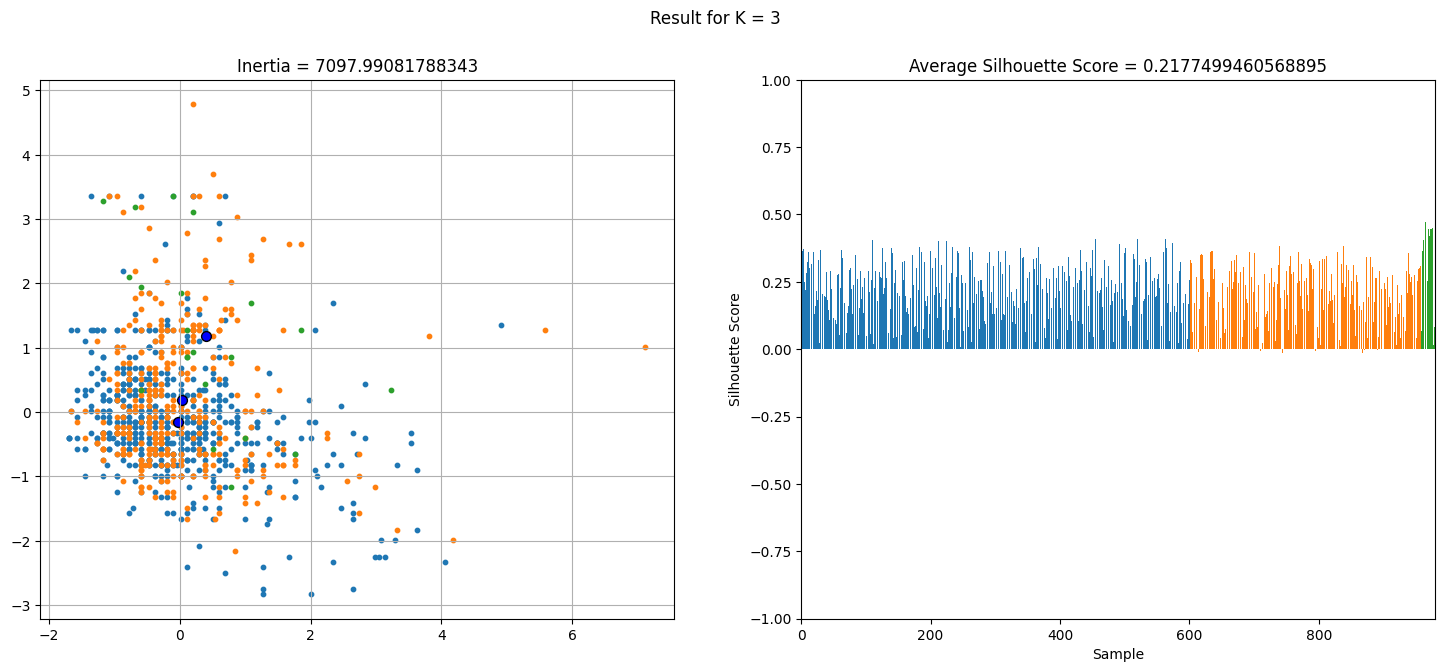

In [87]:
K = 3
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
silhouette_values = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
fig.suptitle(f"Result for K = {K}")
for i in range(0,K):
    ax1.scatter(X[cluster_labels == i,0], X[cluster_labels == i,1], s=10)
ax1.scatter(centroids[:,0],centroids[:,1], s=50, color='b', edgecolor='k')
ax1.set_title(f"Inertia = {inertia}")
ax1.grid()
sample = 0
for i in range(0,K):
    sil = silhouette_values[cluster_labels == i]
    ax2.bar(np.arange(sample,sample + sil.size),sil)
    sample = sample + sil.size
ax2.axis([0, len(X), -1, 1])
ax2.set_xlabel('Sample')
ax2.set_ylabel('Silhouette Score')
ax2.set_title(f"Average Silhouette Score = {silhouette_avg}")
plt.show()

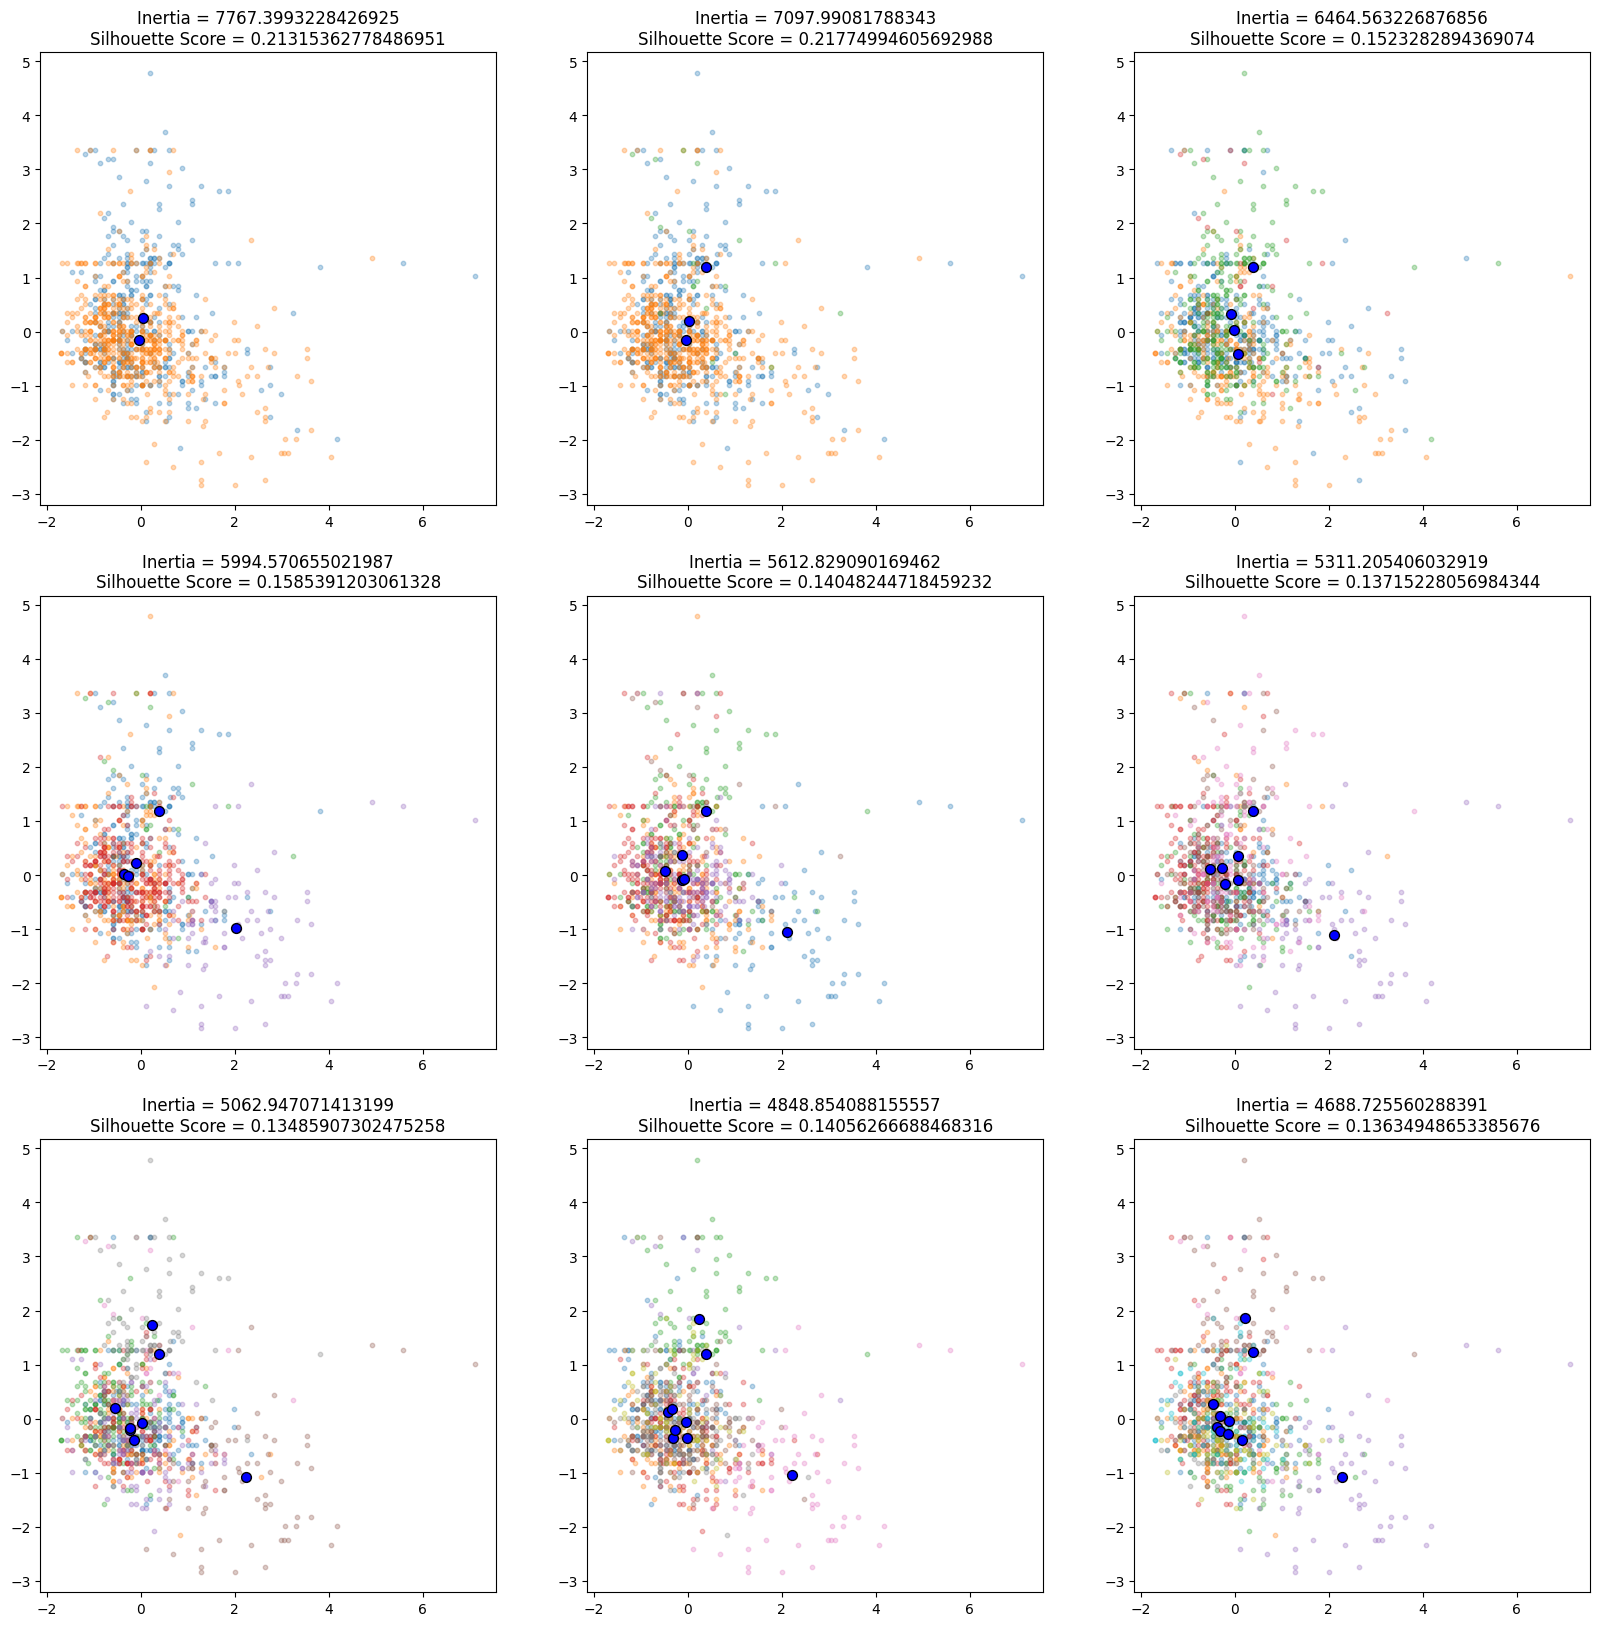

In [79]:
inertia_values = []
silhouette_avgs = []
fig2 = plt.figure(figsize=(20,20))
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(X)
    cluster_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia_values.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    ax = fig2.add_subplot(330 + i - 1)
    for j in range(0,i):
        ax.scatter(X[cluster_labels == j,0], X[cluster_labels == j,1], s=10, alpha=0.3)
    ax.scatter(centroids[:,0],centroids[:,1], s=50, color='b', edgecolor='k')
    ax.set_title(f"Inertia = {kmeans.inertia_}\nSilhouette Score = {silhouette_avg}")

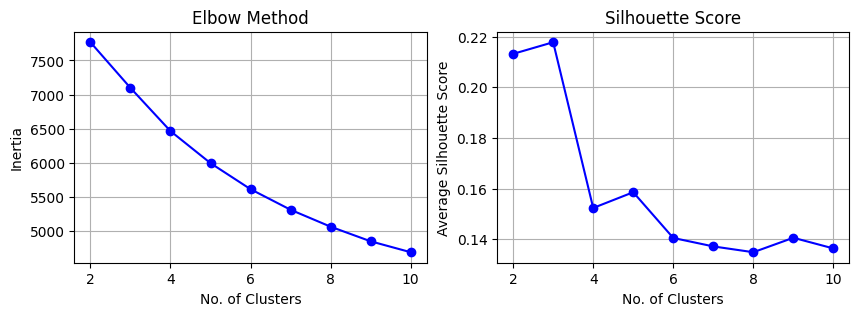

In [80]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(np.arange(2,11),inertia_values,'o-b')
plt.grid()
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.subplot(122)
plt.plot(np.arange(2,11),silhouette_avgs,'o-b')
plt.grid()
plt.xlabel('No. of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score')
plt.show()